In [85]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score, roc_curve

In [86]:
features_df = pd.read_csv('training_set_features.csv')
labels_df = pd.read_csv('training_set_labels.csv')

test_df = pd.read_csv('test_set_features.csv')

In [87]:
def preprocess(df_main):
    
    df = df_main.copy()
    all_cols = df.columns

    if 'education' in all_cols:
        df['education'] = df['education'].replace({
            'Some College': 0,
            'College Graduate': 1,
            '< 12 Years': 2,
            '12 Years': 3
        })

    if 'age_group' in all_cols:
        df['age_group'] = df['age_group'].replace({
            '18 - 34 Years': 0,
            '35 - 44 Years': 1,
            '45 - 54 Years': 2,
            '55 - 64 Years': 3,
            '65+ Years': 4
        })

    if 'race' in all_cols:
        df['race'] = df['race'].replace({
            'Black': 0,
            'White': 1,
            'Other or Multiple': 2,
            'Hispanic': 3
        })

    if 'sex' in all_cols:
        df['sex'] = df['sex'].replace({
            'Female': 0,
            'Male': 1
        })

    if 'income_poverty' in all_cols:
        df['income_poverty'] = df['income_poverty'].replace({
            'Below Poverty': 0,
            '<= $75,000, Above Poverty': 1,
            '> $75,000': 2
        })

    if 'marital_status' in all_cols:
        df['marital_status'] = df['marital_status'].replace({
            'Not Married': 0,
            'Married': 1
        })

    if 'employment_status' in all_cols:
        df['employment_status'] = df['employment_status'].replace({
            'Unemployed': 0,
            'Not in Labor Force': 1,
            'Employed': 2
        })

    if 'rent_or_own' in all_cols:
        df['rent_or_own'] = df['rent_or_own'].replace({
            'Rent': 0,
            'Own': 1
        })

    if 'hhs_geo_region' in all_cols:
        df['hhs_geo_region'] = df['hhs_geo_region'].replace({
            'atmpeygn': 1,
            'bhuqouqj': 2,
            'dqpwygqj': 3,
            'fpwskwrf': 4,
            'kbazzjca': 5,
            'lrircsnp': 6,
            'lzgpxyit': 7,
            'mlyzmhmf': 8,
            'oxchjgsf': 9,
            'qufhixun': 10
        })

    if 'employment_industry' in all_cols:
        df['employment_industry'] = df['employment_industry'].replace({
            'arjwrbjb': 0,
            'atmlpfrs': 1,
            'cfqqtusy': 2,
            'dotnnunm': 3,
            'fcxhlnwr': 4,
            'haxffmxo': 5,
            'ldnlellj': 6,
            'mcubkhph': 7,
            'mfikgejo': 8,
            'msuufmds': 9,
            'nduyfdeo': 10,
            'phxvnwax': 11,
            'pxcmvdjn': 12,
            'qnlwzans': 13,
            'rucpziij': 14,
            'saaquncn': 15,
            'vjjrobsf': 16,
            'wlfvacwt': 17,
            'wxleyezf': 18,
            'xicduogh': 19,
            'xqicxuve': 20
        })

    if 'employment_occupation' in all_cols:
        df['employment_occupation'] = df['employment_occupation'].replace({
            'bxpfxfdn': 1,
            'ccgxvspp': 2,
            'cmhcxjea': 3,
            'dcjcmpih': 4,
            'dlvbwzss': 5,
            'emcorrxb': 6,
            'haliazsg': 7,
            'hfxkjkmi': 8,
            'hodpvpew': 9,
            'kldqjyjy': 10,
            'mxkfnird': 11,
            'oijqvulv': 12,
            'pvmttkik': 13,
            'qxajmpny': 14,
            'rcertsgn': 15,
            'tfqavkke': 16,
            'ukymxvdu': 17,
            'uqqtjvyb': 18,
            'vlluhbov': 19,
            'xgwztkwe': 20,
            'xqwwgdyp': 21,
            'xtkaffoo': 22,
            'xzmlyyjv': 23
        })

    if 'census_msa' in all_cols:
        df['census_msa'] = df['census_msa'].replace({
            'Non-MSA': 0,
            'MSA, Not Principle  City': 1,
            'MSA, Principle City': 2
        })

    for column in df.columns:
        mode = df[column].mode()[0]
        df[column] = df[column].fillna(mode)

    return df


In [88]:
def preprocess_vaccine_data(df_main, labels_df, str):
    df = df_main.copy()
    df[str] = labels_df[str]
    column_names = df.columns[1:36]
    
    vaccine_counts = {}
    total_counts = {}
    
    for col in column_names:
        count_per_col = df[df[str] == 1].groupby(col).size()
        total_counts = df[(df[str] == 1) | (df[str] == 0)].groupby(col).size()
        vaccine_counts[col] = count_per_col / total_counts

    if str in vaccine_counts:
        del vaccine_counts[str]
    
    df = df.drop(columns=str)

    mean_v = {}
    for col, counts in vaccine_counts.items():
        mean_v[col] = (np.max(counts) - np.min(counts)) * counts.size

    for col, mean_value in mean_v.items():
        if mean_v[col] < 0.1:
            df = df.drop(columns=col)
    
    return df

In [89]:
def train_and_evaluate(X_train, y_train, X_test, y_test):
    
    model = LogisticRegression(max_iter=5000)
    model.fit(X_train, y_train)
    
    y_prob = model.predict_proba(X_test)
    
    # print("Output:", y_prob[1:10])
    
    threshold = 0.5
    y_pred = (y_prob[:, 1] >= threshold)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob[:, 1])
    print("Accuracy:", accuracy)
    print("ROC AUC:", roc_auc)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
    
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    return model

/tmp/ipykernel_41402/2529201872.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace({
/tmp/ipykernel_41402/2529201872.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age_group'] = df['age_group'].replace({
/tmp/ipykernel_41402/2529201872.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fu

Accuracy: 0.8416323474354175
ROC AUC: 0.830750240707363


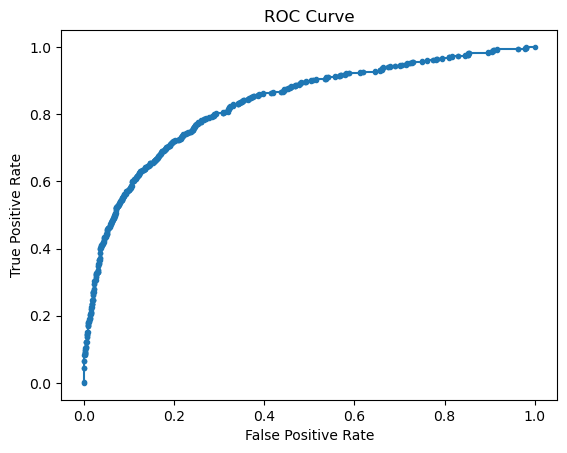

In [90]:
df1 = preprocess(features_df)
# df_xyz = preprocess_vaccine_data(df1,labels_df,'xyz_vaccine')
df_xyz = df1
X_train_xyz, X_test_xyz, y_train_xyz, y_test_xyz = train_test_split(df_xyz, labels_df['xyz_vaccine'], test_size=0.1, random_state=42)
# print(X_train_xyz)

model_xyz = train_and_evaluate(X_train_xyz, y_train_xyz, X_test_xyz, y_test_xyz)

/tmp/ipykernel_41402/2529201872.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace({
/tmp/ipykernel_41402/2529201872.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age_group'] = df['age_group'].replace({
/tmp/ipykernel_41402/2529201872.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fu

Accuracy: 0.793710220891052
ROC AUC: 0.8540735054217445


/home/mjolnir65/anaconda3/envs/pymc_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


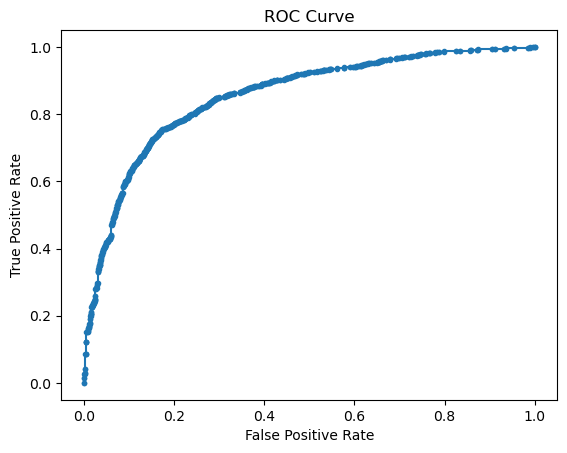

In [91]:
df3 = preprocess(features_df)
# df_s = preprocess_vaccine_data(df3,labels_df,'seasonal_vaccine')
df_s = df3

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(df_s, labels_df['seasonal_vaccine'], test_size=0.1, random_state=42)
# print(X_train_xyz)

model_s = train_and_evaluate(X_train_s, y_train_s, X_test_s, y_test_s)

In [92]:
test_final_df = preprocess(test_df)

y_xyz = model_xyz.predict_proba(test_final_df)
y_s = model_s.predict_proba(test_final_df)



/tmp/ipykernel_41402/2529201872.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace({
/tmp/ipykernel_41402/2529201872.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age_group'] = df['age_group'].replace({
/tmp/ipykernel_41402/2529201872.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fu

In [93]:
print(len(test_df['respondent_id'].tolist()))
print(len(y_xyz[:,1]))
print(len(y_xyz[:,1]))

output_df = pd.DataFrame({
    'respondent_id': test_df['respondent_id'].tolist(),
    'xyz_vaccine': y_xyz[:,1],
    'seasonal_vaccine': y_s[:,1]
})

output_df.to_csv('output.csv', index=False)


26708
26708
26708
